# Example use of the Shot class

The shot class features 
* A Dictionary / list of the signals within this shot
* Pre-processing functionality for the data signals within a shot
* Data loading of the signal data (implemented by calling the signal's getter methods)
* a Target function that give a time-base.

In this notebook we demonstrate how a shot is instantiated and how signals are specified. Then we investigate the internals of the `preprocess` method that loads the data and interpolates it on a common time-base.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plasma.primitives.machine import MachineD3D
from plasma.data.user_signals import fs07, dens, ip, q95
from plasma.primitives.shots import Shot
from plasma.utils.processing import resample_signal

import numpy as np
import matplotlib.pyplot as plt

In [6]:
MachineD3D.current_threshold

AttributeError: type object 'MachineD3D' has no attribute 'current_threshold'

To instantiate a shot, we only need to provide a shot number, a machine, and a list of signals.
All other information, such as `ttd` and `is_disruptive` will be filled in during pre-processing.

In [7]:
my_shot = Shot(183462, MachineD3D(), [fs07, dens, ip, q95])

# List the signals that are in the shot
for s in my_shot.signals:
    print("Signal ", s, " is of type ", type(s))

Signal  filterscope fs07  is of type  <class 'plasma.primitives.signal.Signal'>
Signal  Plasma density  is of type  <class 'plasma.primitives.signal.Signal'>
Signal  plasma current  is of type  <class 'plasma.primitives.signal.Signal'>
Signal  q95 safety factor  is of type  <class 'plasma.primitives.signal.Signal'>


We now have the shot loaded. Next we walk through the steps
in the `preprocess` member function

In [8]:
# To pre-process the shot we use the following fields of the
# configuration dict

dummy_conf = {"paths": {"data": "what_is_this", "signal_prepath": "/projects/FRNN/signal_data_new_2021/"}, 
              "data": {"dt": 0.01, "T_min_warn": 0.0},
              "model": {"length": 0.0}}

In [ ]:
# The first step is to load all signals
res = my_shot._load_signal_data(dummy_conf)

In [ ]:
plt.plot(res[0][0], res[1][0])

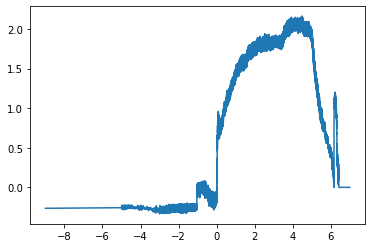

In [7]:
plt.plot(res[0][1], res[1][1])

In [8]:
# Let's print the minimum and the maximum of the signals we have in our shot
print(res[0][0].min(), res[0][0].max(), res[0][1].min(), res[0][1].max())
# The global minimum and maximum are also in the result from _load_signal_data
print(res[2], res[3])
t_min, t_max = res[2], res[3]

-0.049980003 7.9500003 -8.99975 6.99975
-0.049980003 6.99975


In [9]:
res[0][0].shape, res[1][0].shape

((400000,), (400000, 1))

We now have 2 signals loaded. As a next step we want to put all signals onto a common time-base.


In [14]:
for (signal, tb, sig_data) in zip(my_shot.signals, res[0], res[1]):
    # Cut the signal to [t_min:t_max]
    good_idx = (tb >= t_min) & (tb <= t_max)
    tb_x = tb[good_idx]
    sig_x = sig_data[good_idx]
    # Interpolate on new time-base
    tb_rs, sig_rs = resample_signal(tb, sig, t_min, t_max, conf["data"]["dt"], self.dtype)
#             # Populate signals_dict with the re-sampled 
#             self.signals_dict[signal] = sig_rs

#         # Why to we take only the last time-base and convert to ttd?
#         self.ttd = self.convert_to_ttd(tb_rs, conf)

In [11]:
sig_x.shape

NameError: name 'sig_x' is not defined

In [13]:
tb.shape

(400000, 1)

In [36]:
good_idx.shape

(400000, 1)

In [ ]:
plot(tb)